
# Project: Investigate a Dataset (No-show appointments Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

> ● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

> ● ‘Neighborhood’ indicates the
location of the hospital.

> ● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

## Questions to be answered:
### Question 1: (Is elder people more likely to miss their appointment?)
### Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshow-appointments.csv', sep=';')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

There are 110527 of scheduled appointments

In [4]:
# check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# cheching for number of unique values in each column
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# function to find unique values only
def unique(data):
 
    unique = []
     
    for u in data:
        if u not in unique:
            unique.append(u)

    for u in unique:
        print(u)

In [10]:
unique(df['No-show'])

No
Yes


### Data Cleaning

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I found that the min of Age is -1.0 which cannot be true so I droped ages less than 0

In [12]:
# drop the rows of age < 0
df.drop(df[df["Age"] < 0].index, inplace=True)

Turned out that there was only one row less than 0 of age

In [13]:
df.shape

(110526, 14)

There are misspelled words

In [14]:
df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True)

Converting (ScheduledDay) & (AppointmentDay) to datetime

In [15]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [17]:
# I droped these columns because I don't think I'll use them
df.drop(['Neighbourhood', 'PatientId', 'AppointmentID', 'Scholarship'], axis=1, inplace=True)

In [18]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,1,1,0,0,0,No


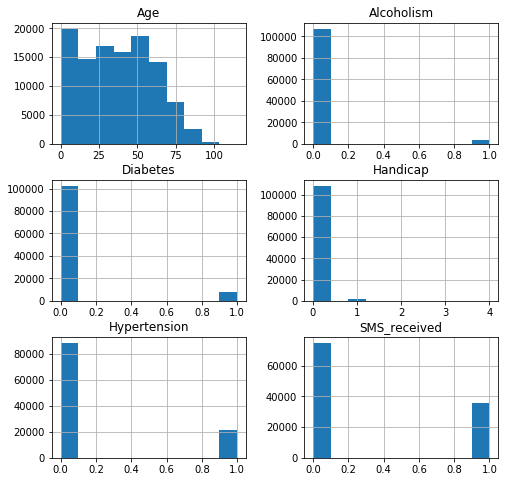

In [19]:
df.hist(figsize=(8,8));

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: (Is elder people more likely to miss their appointment?)

In [20]:
df['No-show'].replace({'No': [0], 'Yes': [1]} , inplace = True)

In [21]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,1,1,0,0,0,0


In [22]:
showed = df['No-show'] == 1
missed = df['No-show'] == 0
df['showed'] = showed
df['missed'] = missed

In [23]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,showed,missed
0,F,2016-04-29 18:38:08,2016-04-29,62,1,0,0,0,0,0,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,1,1,0,0,0,0,False,True


In [24]:
df['No-show'].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

clearly we can see that the number of people who didn't show is higher.

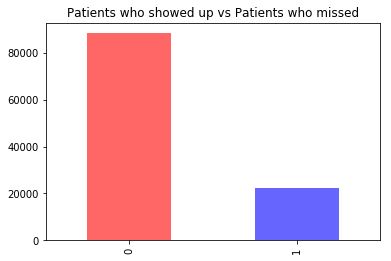

In [25]:
df['No-show'].value_counts().plot(kind='bar', color=['red', 'blue'], title='Patients who showed up vs Patients who missed', alpha=.6);

The red bar is for the patients who did not show, and the blue bar is for the patients who showed. This chart shows that the number of attendance is very low comparing to the total of scheduled appointments.

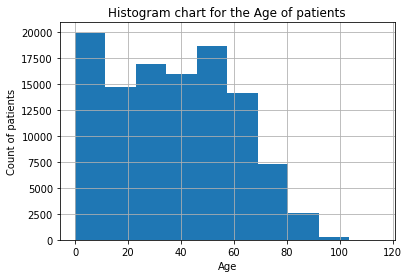

In [26]:
#1D histogram
df['Age'].hist();
plt.xlabel('Age');
plt.ylabel('Count of patients');
plt.title('Histogram chart for the Age of patients');
plt.legend();

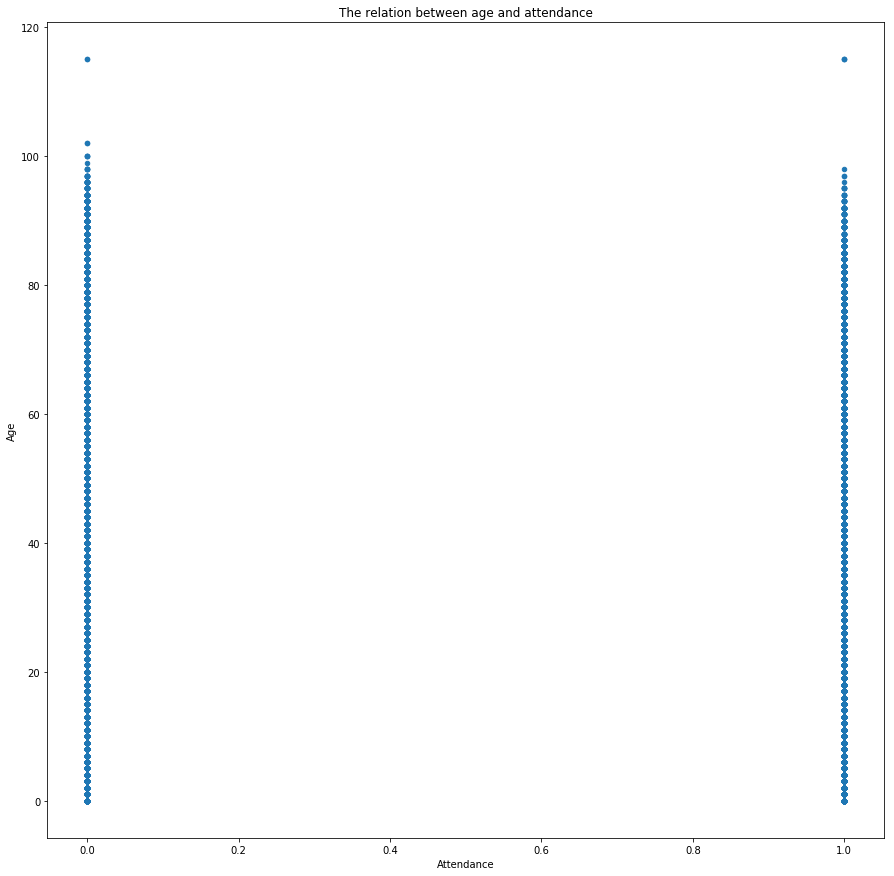

In [27]:
# checking if there is a relation between age and attendance
df.plot.scatter(x='No-show', y='Age', figsize=(15,15));
plt.title('The relation between age and attendance');
plt.ylabel('Age');
plt.xlabel('Attendance')
plt.legend();

In [28]:
df.Age[showed].mean()

34.317666562121957

In [29]:
df.Age[missed].mean()

37.790504154999034

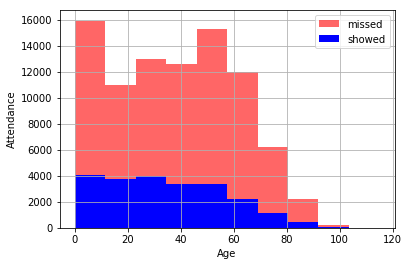

In [30]:
df.Age[missed].hist(color=['red'], alpha=.6, bins=10, label='missed');
df.Age[showed].hist(color=['blue'], alpha=1, bins=10, label='showed');
plt.xlabel('Age');
plt.ylabel('Attendance');
plt.legend();

We can see that younger people are more likely to miss their appointments. 

### Research Question 2  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [31]:
df['Gender'].replace({'F': [0], 'M': [1]} , inplace = True)

In [32]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,showed,missed
0,0,2016-04-29 18:38:08,2016-04-29,62,1,0,0,0,0,0,False,True
1,1,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,False,True
2,0,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,False,True
3,0,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,False,True
4,0,2016-04-29 16:07:23,2016-04-29,56,1,1,0,0,0,0,False,True


In [33]:
male = df['Gender'] == 1
female = df['Gender'] == 0

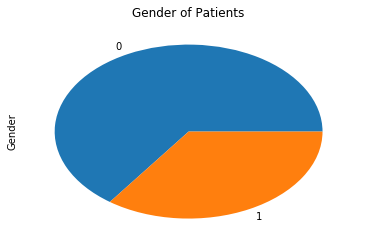

In [34]:
df['Gender'].value_counts().plot(kind='pie', title='Gender of Patients');

Blue is for female, and orange is for male. Most of the scheduled appointments for females.

In [35]:
df.Gender[missed].value_counts()

0    57245
1    30962
Name: Gender, dtype: int64

In [36]:
df.Gender[showed].value_counts()

0    14594
1     7725
Name: Gender, dtype: int64

So females are more likely to attend their appointment.

In [37]:
df.SMS_received[showed].value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

In [38]:
df.SMS_received[missed].value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

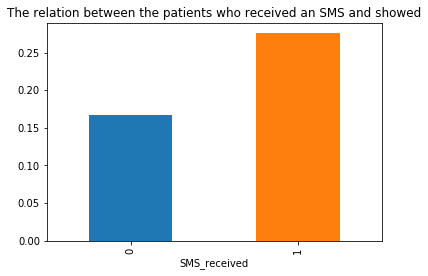

In [39]:
df.groupby('SMS_received').showed.mean().plot(kind='bar', title='The relation between the patients who received an SMS and showed');

Another visualization down comparing between receiving an SMS and showing up or not.

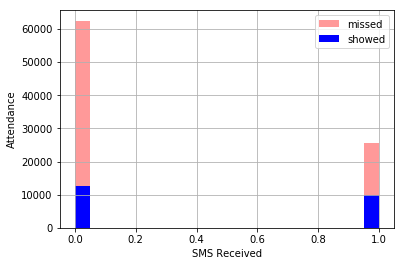

In [40]:
df.SMS_received[missed].hist(color=['red'], alpha=.4, bins=20, label='missed');
df.SMS_received[showed].hist(color=['blue'], alpha=1, bins=20, label='showed');
plt.xlabel('SMS Received');
plt.ylabel('Attendance');
plt.legend();

People who received an SMS are more likely to show up.

In [41]:
df['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

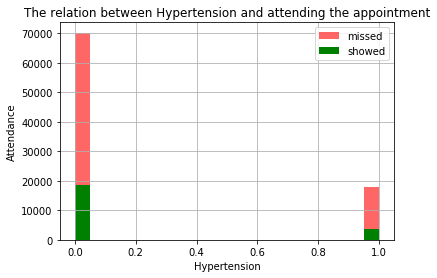

In [42]:
df.Hypertension[missed].hist(color=['red'], alpha=.6, bins=20, label='missed');
df.Hypertension[showed].hist(color=['green'], alpha=1, bins=20, label='showed');
plt.title('The relation between Hypertension and attending the appointment');
plt.xlabel('Hypertension');
plt.ylabel('Attendance');
plt.legend();

In [43]:
df['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [44]:
unique(df['Handicap'])

0
1
2
3
4


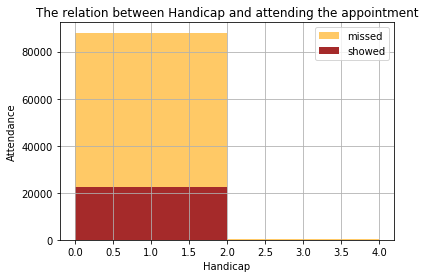

In [45]:
df.Handicap[missed].hist(color=['orange'], alpha=.6, bins=2, label='missed');
df.Handicap[showed].hist(color=['brown'], alpha=1, bins=2, label='showed');
plt.title('The relation between Handicap and attending the appointment');
plt.xlabel('Handicap');
plt.ylabel('Attendance');
plt.legend();

In [46]:
df['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

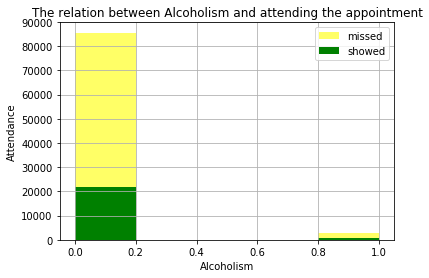

In [47]:
df.Alcoholism[missed].hist(color=['yellow'], alpha=.6, bins=5, label='missed');
df.Alcoholism[showed].hist(color=['green'], alpha=1, bins=5, label='showed');
plt.title('The relation between Alcoholism and attending the appointment');
plt.xlabel('Alcoholism');
plt.ylabel('Attendance');
plt.legend();

In [48]:
df['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

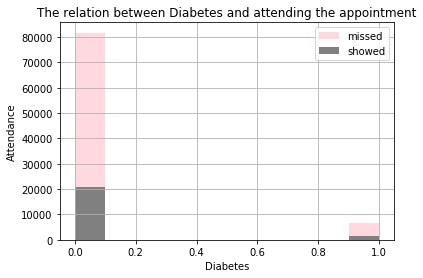

In [49]:
df.Diabetes[missed].hist(color=['pink'], alpha=.6, label='missed');
df.Diabetes[showed].hist(color=['grey'], alpha=1, label='showed');
plt.title('The relation between Diabetes and attending the appointment');
plt.xlabel('Diabetes');
plt.ylabel('Attendance');
plt.legend();

<a id='conclusions'></a>
## Conclusions

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The data did not need much of cleaning, there are no duplicates nor null values.

> The main important reason I found for not showing up is whether the patient receives an SMS or not. Other than that females are more likely to attend their appointment. Also, there are less patients above the age of 80 but most of them did not attent their appointments, but in general younger patients are more likely not to attend.


## Limitations

> It would be better if there was prices included, and whether the appointment is urgent or not.



In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0